<a href="https://colab.research.google.com/github/sabinaML/Classification/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
import sklearn.datasets

In [ ]:
df = sklearn.datasets.fetch_california_housing()

In [ ]:
for key in df.keys():
    print( key )

data
target
frame
target_names
feature_names
DESCR


In [ ]:
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
df.target_names

['MedHouseVal']

In [ ]:
df.target[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [ ]:
df.data[:5]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

In [ ]:
print(sklearn.datasets.fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
X = pd.DataFrame(df.data, columns=df.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
y.describe()

count    13359.000000
mean         1.708051
std          0.910109
min          0.149990
25%          1.036000
50%          1.556000
75%          2.134500
max          5.000010
Name: MedHouseVal, dtype: float64

In [ ]:
y=pd.DataFrame(df.target, columns=df.target_names)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f740bbe1eb0>]],
      dtype=object)

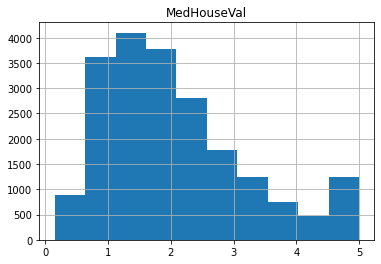

In [ ]:
y.hist()

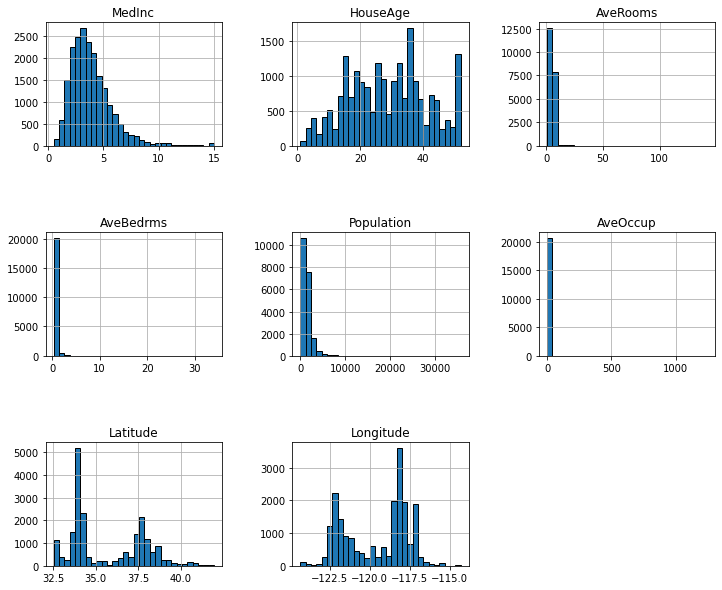

In [ ]:
X.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
y.mean()

MedHouseVal    2.068558
dtype: float64

In [ ]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [ ]:
rmse = mean_squared_error(  y_test ,y_pred_test, squared = False )
rmse

0.7455813830127763

In [ ]:
rmse = mean_squared_error( y_train , y_pred_train,squared = False )
rmse

0.7196757085831575

In [ ]:
r2= r2_score(  y_test, y_pred_test )
r2

0.575787706032451

In [ ]:
r2= r2_score(  y_train , y_pred_train )
r2

0.6125511913966952

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f740c2e8880>]],
      dtype=object)

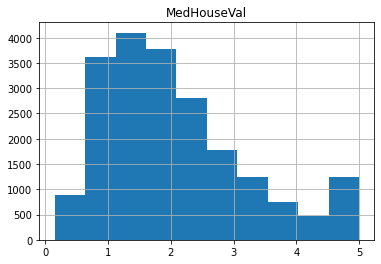

In [ ]:
y.hist()

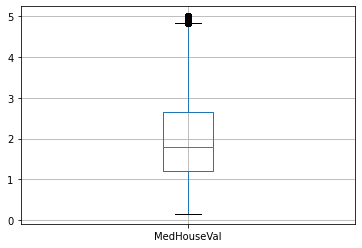

In [ ]:
y.boxplot() # присутствует выброс со значениями больше 4.75

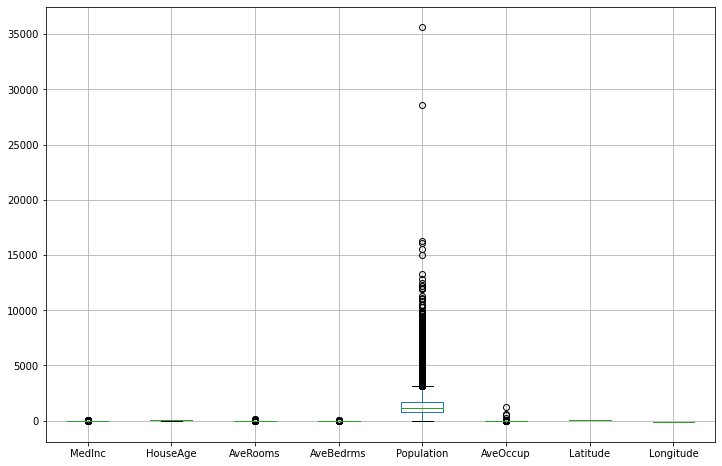

In [ ]:
plt.figure(figsize = (12,8))
X.boxplot()

In [ ]:
pd.concat([X,y], axis=1).corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


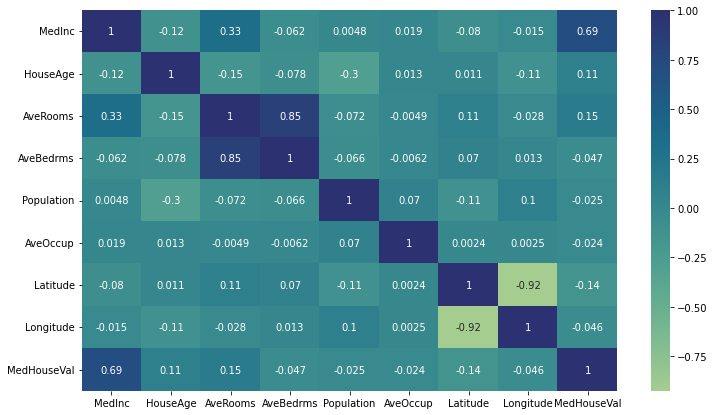

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(pd.concat([X,y], axis=1).corr(), cmap='crest',annot=True)

отберем признаки по корреляционной таблице с наибольшим значением корреляции с целевой переменной (MedInc	HouseAge	AveRooms)

In [ ]:
X = X.iloc[:, [0,1,2]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [ ]:
rmse = mean_squared_error(  y_test ,y_pred_test, squared = False )
rmse

0.8117332473994358

In [ ]:
rmse = mean_squared_error( y_train , y_pred_train, squared = False )
rmse

0.8045908874686399

In [ ]:
r2= r2_score(  y_test,y_pred_test  )
r2

0.49717158850807075

In [ ]:
r2= r2_score(  y_train , y_pred_train )
r2

0.5157263258121171

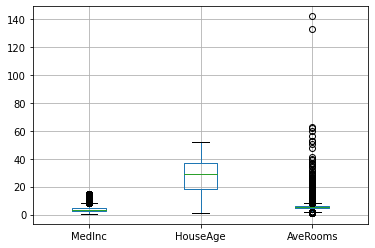

In [ ]:
# значительный выбросы в признаках
X.boxplot()

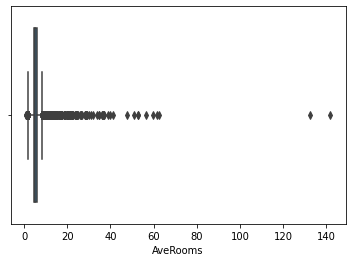

In [ ]:
sns.boxplot(X['AveRooms'])

In [ ]:
df=pd.concat([X,y], axis=1)
df

,MedInc,HouseAge,AveRooms,MedHouseVal
0,8.3252,41.0,6.984127,4.526
1,8.3014,21.0,6.238137,3.585
2,7.2574,52.0,8.288136,3.521
3,5.6431,52.0,5.817352,3.413
4,3.8462,52.0,6.281853,3.422
...,...,...,...,...
20635,1.5603,25.0,5.045455,0.781
20636,2.5568,18.0,6.114035,0.771
20637,1.7000,17.0,5.205543,0.923
20638,1.8672,18.0,5.329513,0.847


In [ ]:
# уберем выбросы и обучим модель на новых данных

In [ ]:
X = df[['MedInc', 'HouseAge', 'AveRooms']].loc[(df['MedInc']<4.74)& (df['AveRooms']<6)& (df['AveRooms']>2.5)]
y = df['MedHouseVal'].loc[(df['MedInc']<4.74)& (df['AveRooms']<6)& (df['AveRooms']>2.5)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [ ]:
rmse = mean_squared_error( y_test , y_pred_test, squared = False )
rmse

0.7171744655988505

In [ ]:
rmse = mean_squared_error( y_train , y_pred_train,squared = False )
rmse

0.7386238202191804

In [ ]:
r2= r2_score( y_test,y_pred_test )
r2

0.35284465999776804

In [ ]:
r2= r2_score( y_train , y_pred_train )
r2

0.3478791491263029

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error( y_test,y_pred_test )

0.35866608091363295

In [ ]:
# Добиться увеличения метрики R2 не удалось, лучшие значения показыват модель с полными данными